# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
train.shape

(1168, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
print(train.isnull().sum().sort_values(ascending=False))

PoolQC         1161
MiscFeature    1124
Alley          1091
Fence           931
FireplaceQu     551
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [8]:
#making list of feature have null values
na_values=[features for features in train.columns if train[features].isnull().sum()>1]

for attribute in na_values:
    print(attribute,np.round(train[attribute].isnull().mean(),2),'%missing values')

LotFrontage 0.18 %missing values
Alley 0.93 %missing values
MasVnrType 0.01 %missing values
MasVnrArea 0.01 %missing values
BsmtQual 0.03 %missing values
BsmtCond 0.03 %missing values
BsmtExposure 0.03 %missing values
BsmtFinType1 0.03 %missing values
BsmtFinType2 0.03 %missing values
FireplaceQu 0.47 %missing values
GarageType 0.05 %missing values
GarageYrBlt 0.05 %missing values
GarageFinish 0.05 %missing values
GarageQual 0.05 %missing values
GarageCond 0.05 %missing values
PoolQC 0.99 %missing values
Fence 0.8 %missing values
MiscFeature 0.96 %missing values


In feature 'PoolQC' there is 99% of value is missing, 80% in 'Fence' 96% in 'MiscFeature', 'Alley' have 93% of missing values we can treat it in appropriate ways

In [9]:
#around 18 features have null values
len(na_values)

18

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [11]:
train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

# EDA

In [12]:
print(na_values)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


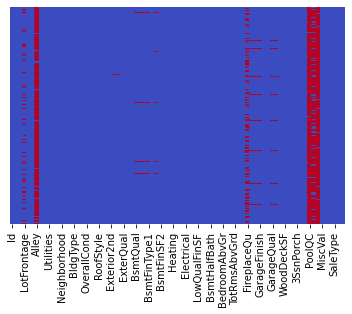

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

In [14]:
#treating missing values
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])

train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])

train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])

train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])

train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])

train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])

train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [15]:
#rest of feature have about 80% of missing values let's drop it
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
#we can drop the id also which is unique id of the house it doesn't make any impact to prediction
train.drop(['Id'],axis=1,inplace=True)

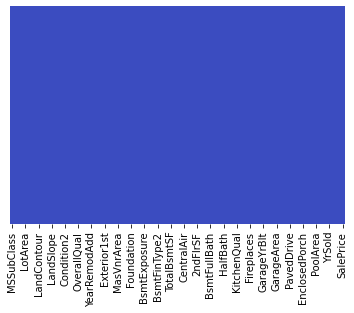

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

No missing values

In [18]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Treated missing values

In [19]:
train.shape

(1168, 76)

In [20]:
train['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [21]:
#feature utilities only containing only one value let's drop it
train.drop(['Utilities'],axis=1,inplace=True)

In [22]:
#we can make list of categorical variables
categorical=[feature for feature in train.columns if train[feature].dtypes == 'O']

print('number of categorical variables \n',len(categorical))
#categorical features
train[categorical].head()

number of categorical variables 
 38


,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [23]:
for i in categorical:
    print("The feature is {} and no of categories are {}".format(i,train[i].unique()))

The feature is MSZoning and no of categories are ['RL' 'RM' 'FV' 'RH' 'C (all)']
The feature is Street and no of categories are ['Pave' 'Grvl']
The feature is LotShape and no of categories are ['IR1' 'Reg' 'IR2' 'IR3']
The feature is LandContour and no of categories are ['Lvl' 'Bnk' 'HLS' 'Low']
The feature is LotConfig and no of categories are ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
The feature is LandSlope and no of categories are ['Gtl' 'Mod' 'Sev']
The feature is Neighborhood and no of categories are ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
The feature is Condition1 and no of categories are ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
The feature is Condition2 and no of categories are ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
The feature

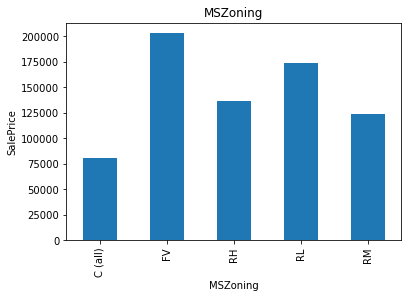

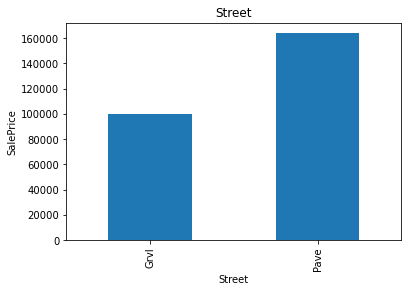

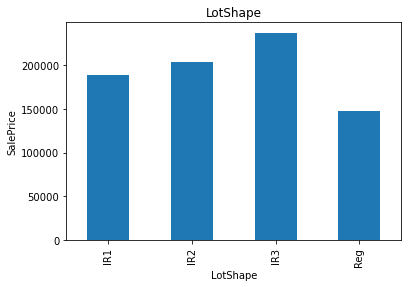

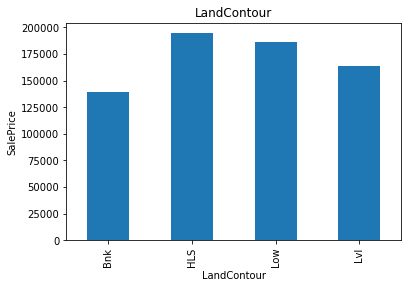

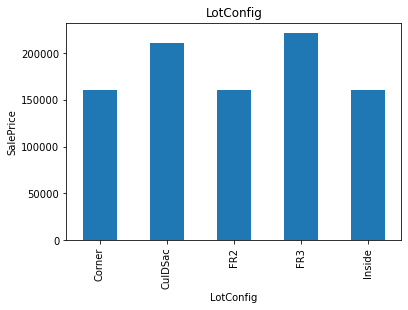

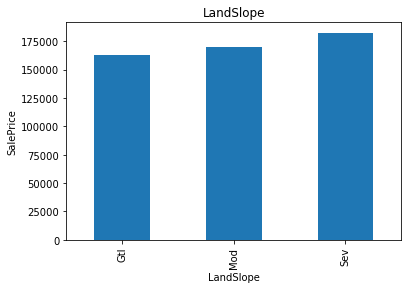

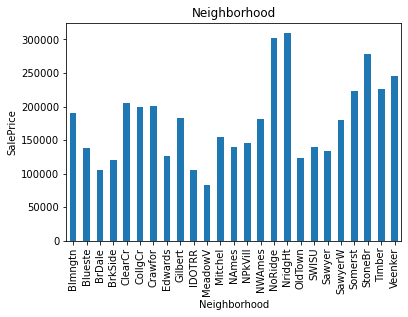

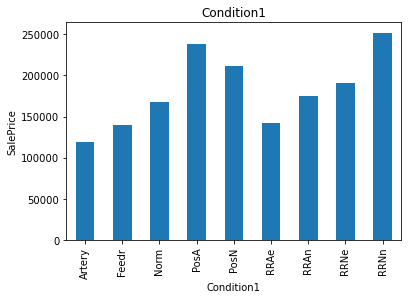

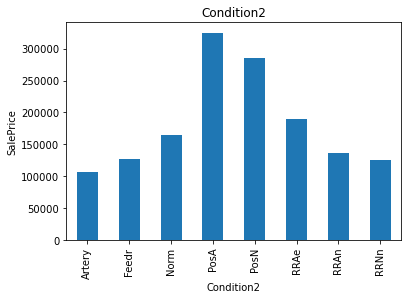

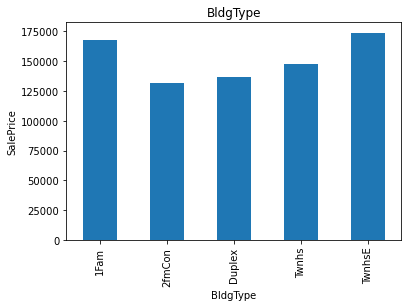

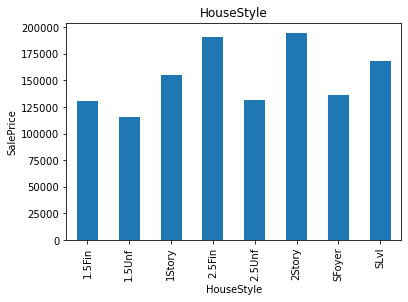

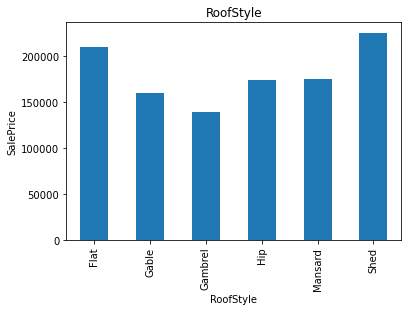

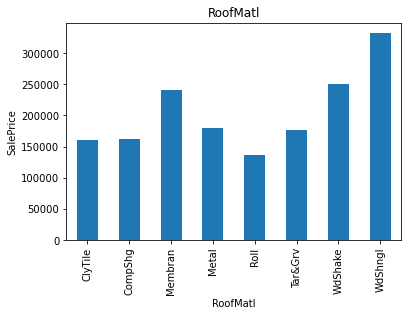

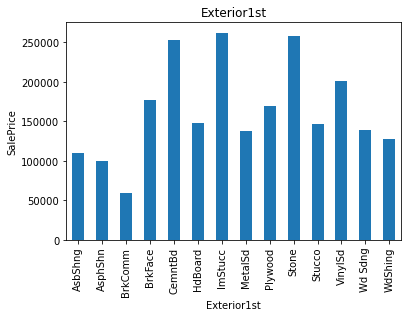

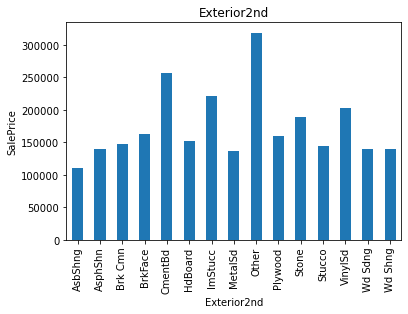

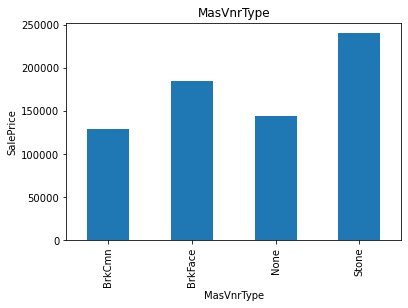

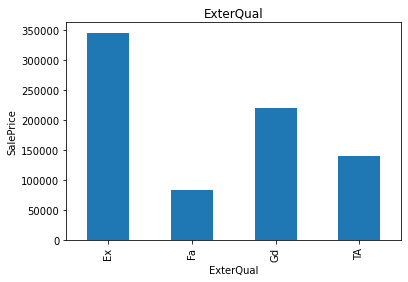

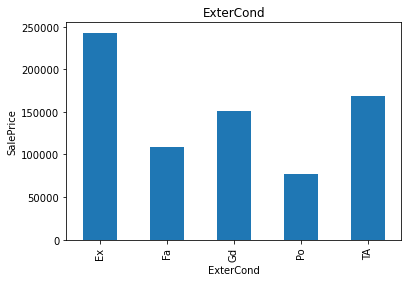

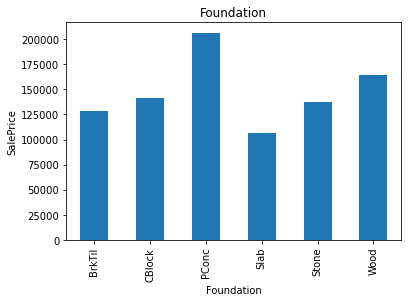

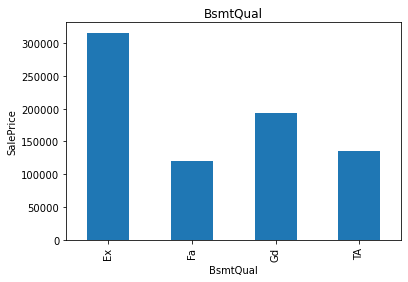

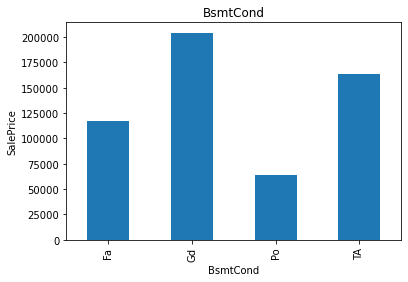

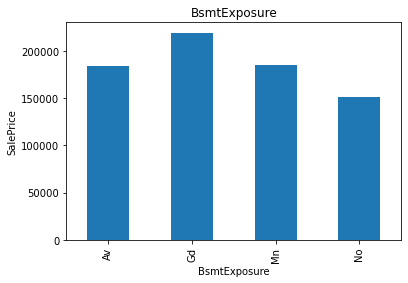

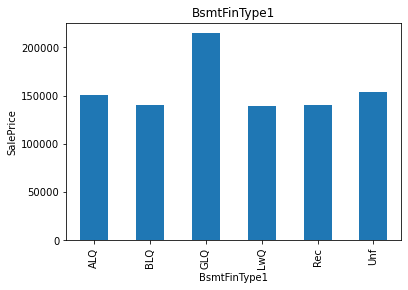

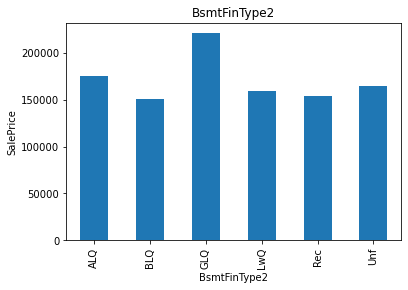

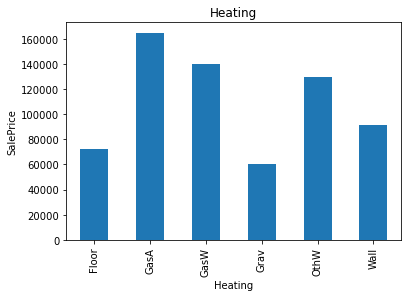

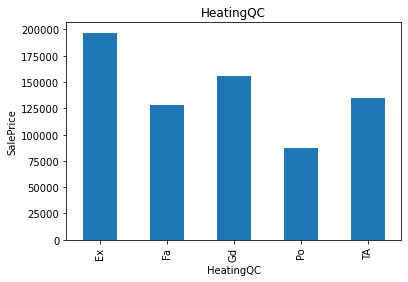

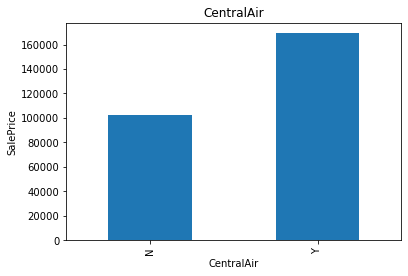

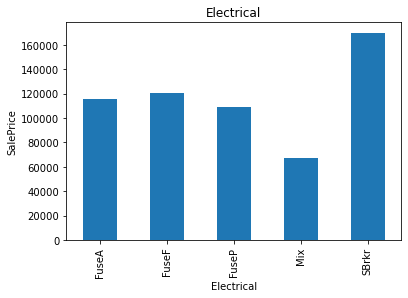

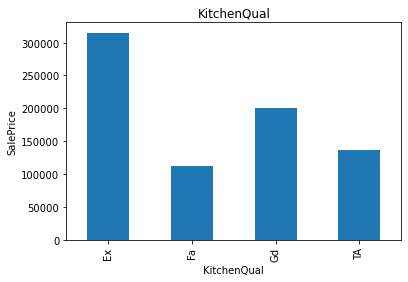

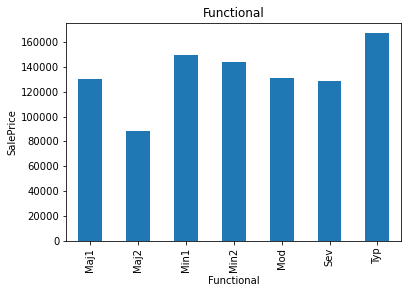

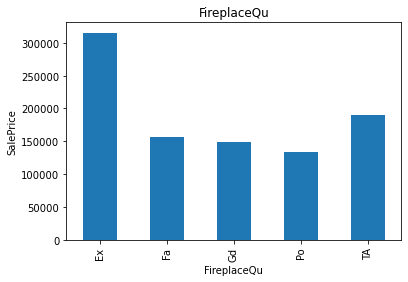

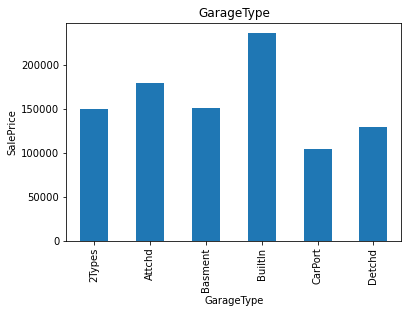

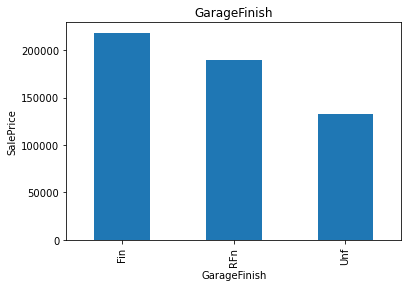

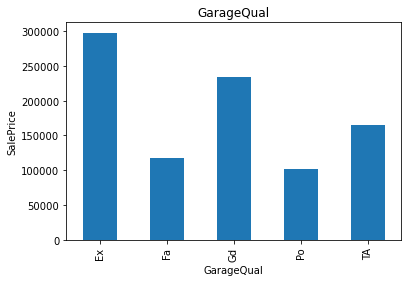

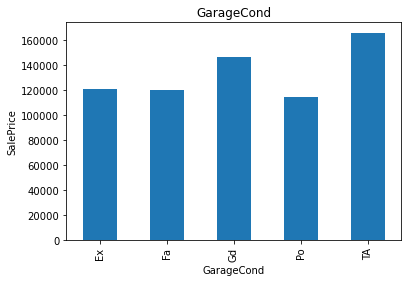

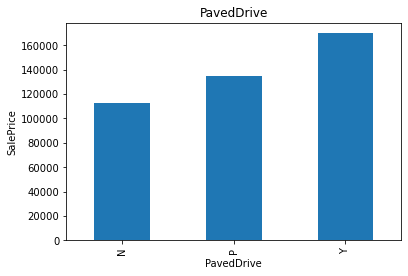

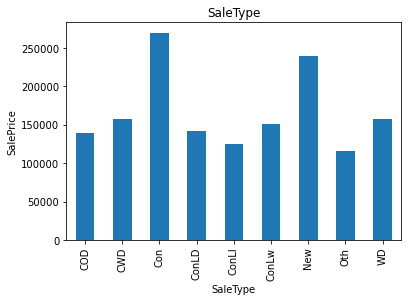

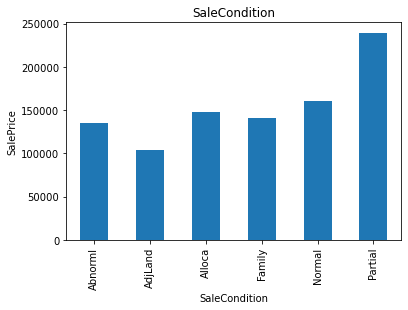

In [24]:
#let's check the relation ship between categorical and dependent feature price
for feature in categorical:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Categorical variables impacting the sale price we can observe that the paved road have high sale price other than gravel roads to the house..

In [25]:
#we can make list of numerical variables
numerical=[feature for feature in train.columns if train[feature].dtypes != 'O']

print('number of numerical variables \n',len(numerical))
#numerical features
train[numerical].head()

number of numerical variables 
 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


Out of 81 features 38 features were numerical

In [26]:
#let's make a list for the features with year
year_feature=[feature for feature in numerical if 'Yr' in feature or 'Year' in feature]

print(year_feature)

train[year_feature].head()

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009


out of 81 features 43 were categorical

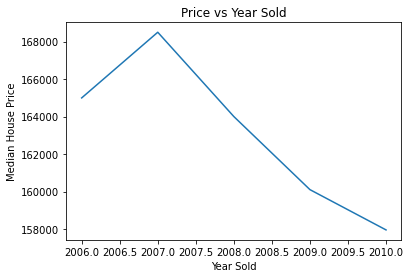

In [27]:
#let's analyze how the year features and sale price impacts
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("Price vs Year Sold")
plt.show()

Price is decreasing every year

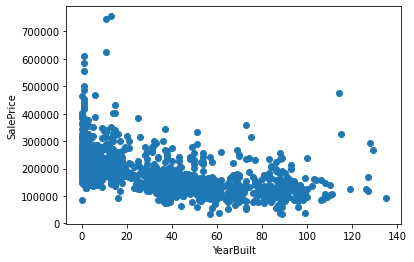

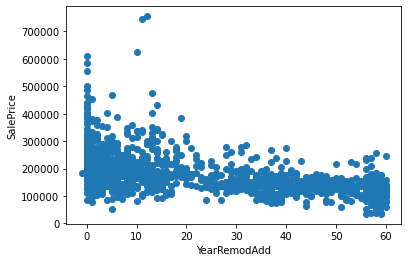

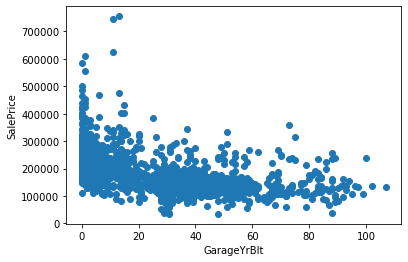

In [28]:
#compare every year features with sale price
for feature in year_feature:
    if feature != 'YrSold':
        df=train.copy()
        #difference between the year variable and year were the house were sold
        df[feature]=df['YrSold']-df[feature]
        
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

We can observe that the year built increasing the sale price decreases, when modification year also increases the price decreases and finally garage year built and price also decreases when year increases

In [29]:
#let's differenciate discrete features and continuous features
discrete=[feature for feature in numerical if len(train[feature].unique())<25 and feature not in year_feature+['Id']]

print("Discrete features count:{}".format(len(discrete),"\t"))

print(discrete,"\n")

print(train[discrete].head())

Discrete features count:17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold'] 

   MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             

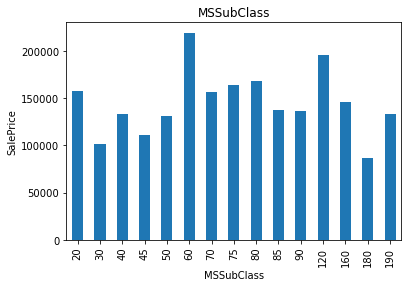

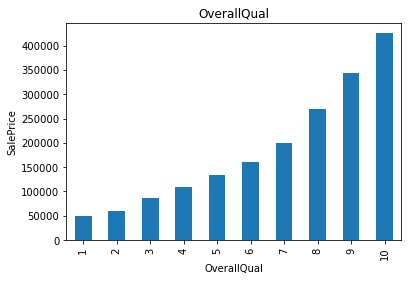

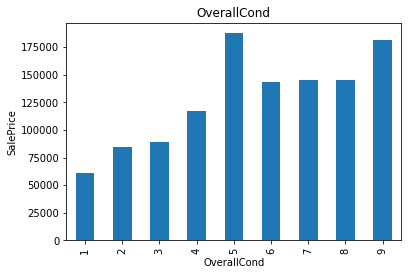

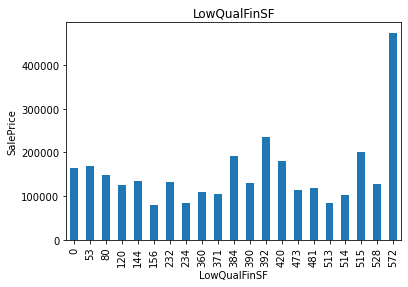

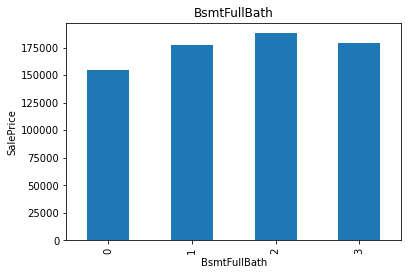

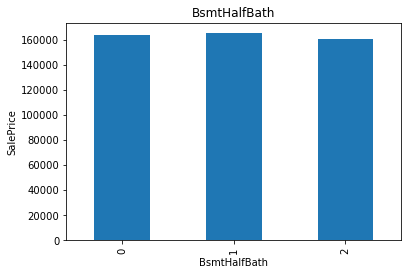

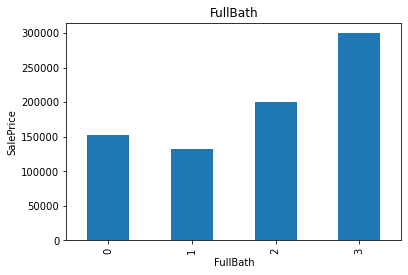

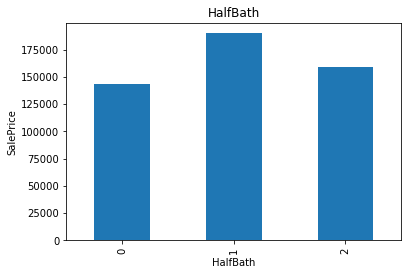

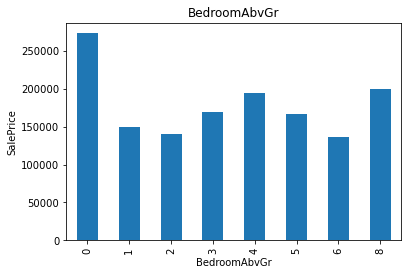

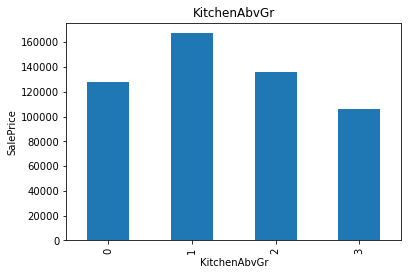

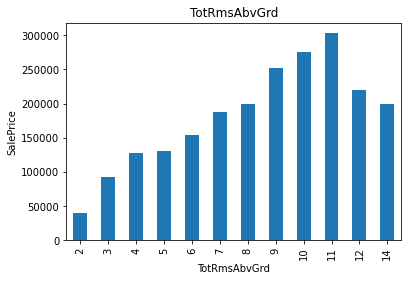

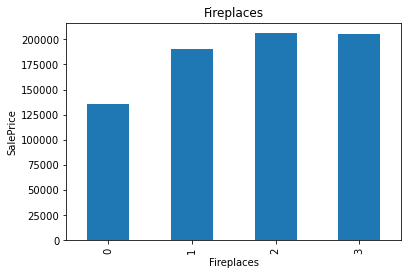

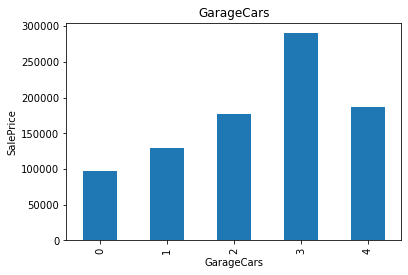

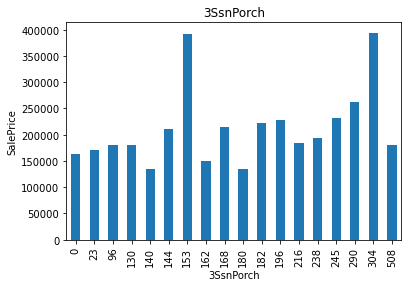

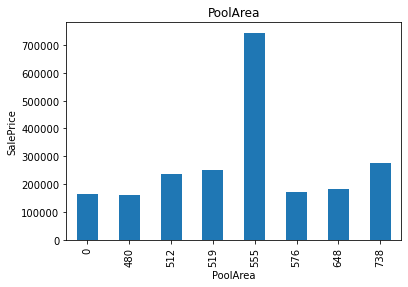

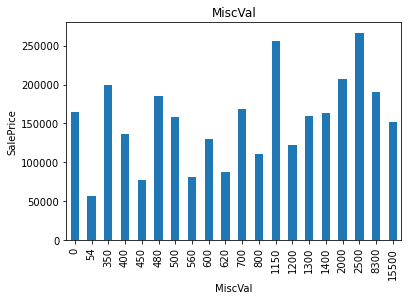

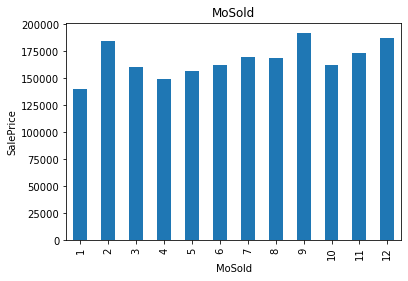

In [30]:
for feature in discrete:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

We can observe that there is some relationship between price annd discrete features, for exaple that the high overall quality have high prices

In [31]:
#continuous variable
continuous=[feature for feature in numerical if  feature not in discrete+year_feature]

print("Continuous features count:{}".format(len(continuous),"\t"))

print(continuous,"\n")

print(train[continuous].head())

Continuous features count:16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice'] 

   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     70.98847     4928         0.0         120           0        958   
1     95.00000    15865         0.0         351         823       1043   
2     92.00000     9920         0.0         862           0        255   
3    105.00000    11751       480.0         705           0       1139   
4     70.98847    16635       126.0        1246           0        356   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0         1078       958         0        958         440           0   
1         2217      2217         0       2217         621          81   
2         1117      1127       886       2013         455         180   
3         

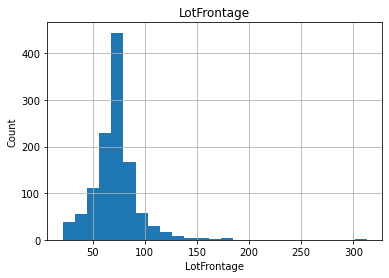

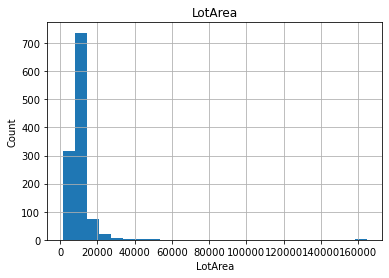

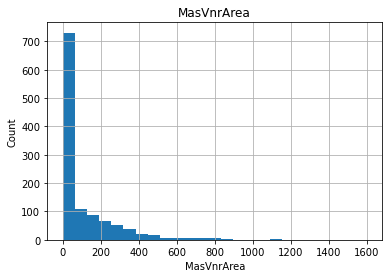

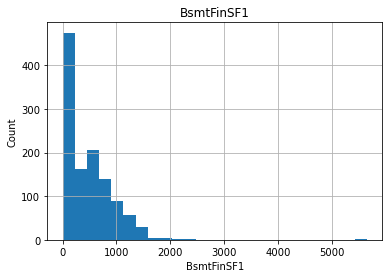

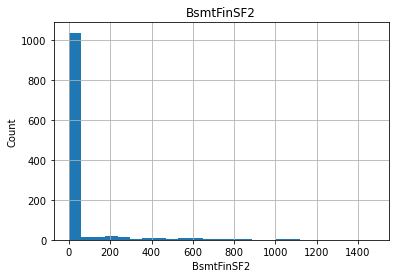

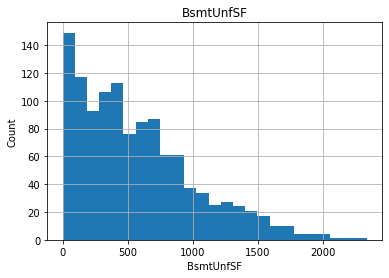

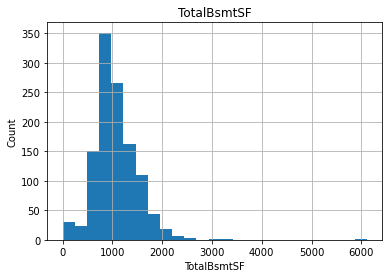

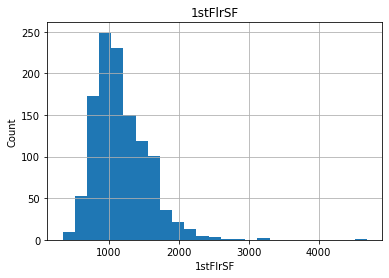

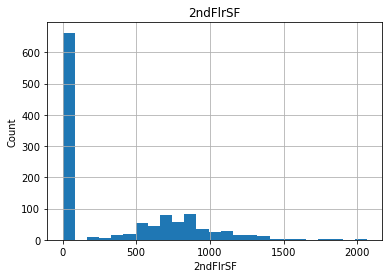

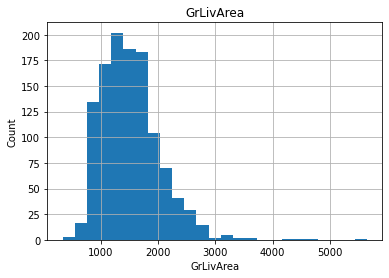

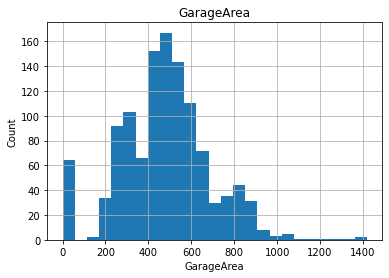

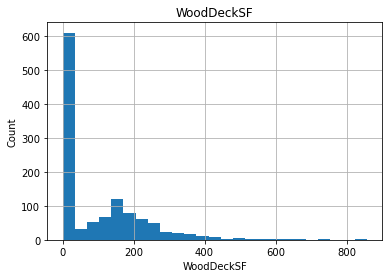

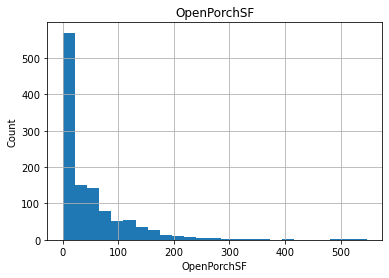

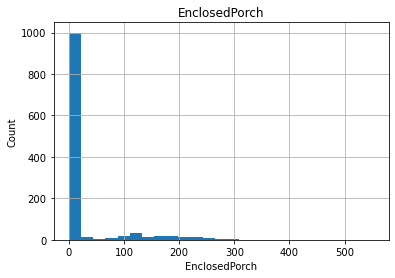

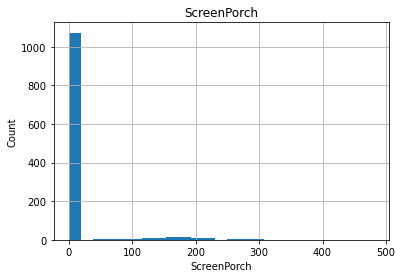

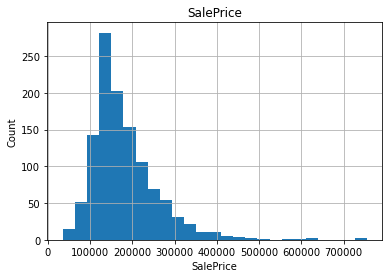

In [32]:
for feature in continuous:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Some features are normally distributed and some are not distributed normally

# Encoding

In [33]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [34]:
#handling categorical
le=LabelEncoder()

for i in categorical:
    train[i]=le.fit_transform(train[i])

In [35]:
#encoded using label encoder
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000


# Outliers

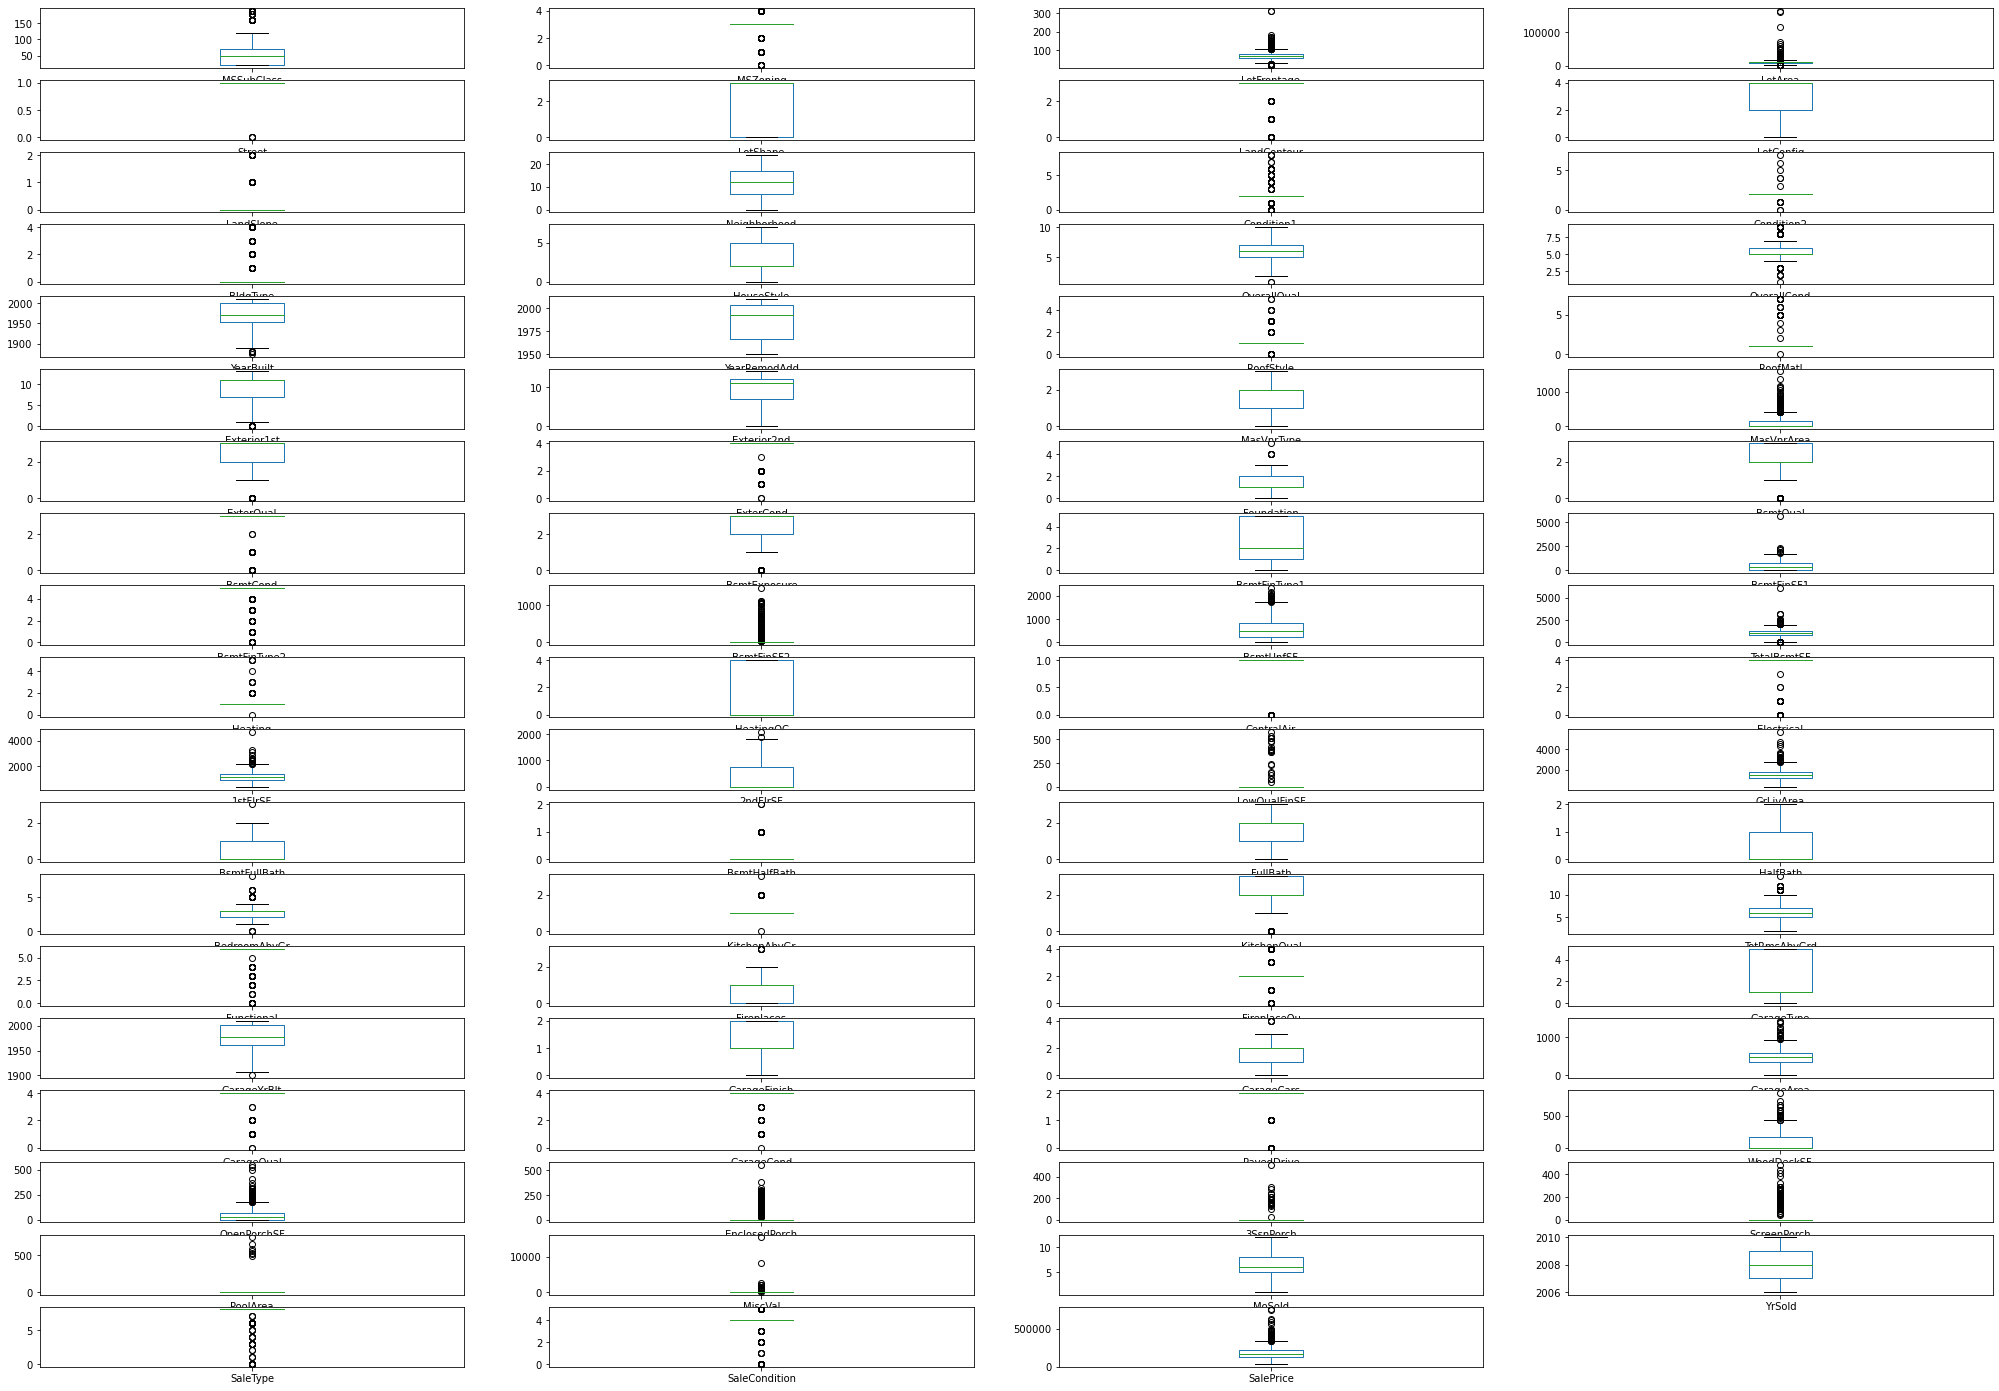

In [36]:
train.plot(kind='box',layout=(19,4),figsize=(35,25),subplots=True)
plt.show()

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train))
train_new=train[(z<3).all(axis=1)]

In [38]:
print(train.shape,"\n")
print(train_new.shape,"\n")

(1168, 75) 

(482, 75) 



In [39]:
print("Percentage of data loss after removing outliers:",(1168-482)/1168*100)

Percentage of data loss after removing outliers: 58.73287671232876


Big loss of of data after removing outliers so not removing outliers

# Correlation

In [40]:
train.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,0.076880,-0.014930,0.013918,-0.042474,-0.044319,0.731815,0.381585,0.070462,-0.056978,0.023988,0.056618,-0.100641,-0.032214,-0.090178,-0.120022,-0.013252,0.027813,-0.024133,0.004186,0.053951,-0.052242,-0.013220,-0.068192,0.017515,-0.052236,0.040573,-0.062403,-0.134170,-0.214042,0.047734,-0.001994,-0.113883,0.045533,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,-0.011378,0.051179,0.022913,-0.035792,0.024708,0.077469,0.073130,-0.000067,-0.027639,-0.092408,-0.010568,-0.025595,-0.068702,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,-0.027246,-0.023952,-0.251833,-0.025651,0.031959,-0.024776,-0.110991,-0.134037,0.189553,-0.299732,-0.174586,0.000913,0.009719,-0.012037,0.005548,-0.033521,-0.063862,0.184815,-0.099269,-0.244844,0.123822,0.002336,0.037414,0.021518,-0.034161,-0.031322,0.027055,-0.032638,-0.058896,0.051188,0.119852,-0.015887,-0.079205,-0.033095,-0.048968,0.012098,-0.064125,-0.007287,0.006345,-0.188837,-0.121209,-0.001906,0.026744,0.111689,-0.031062,-0.091684,0.010658,0.005628,0.125155,-0.261072,0.162566,-0.126031,-0.168364,-0.168881,-0.087375,-0.077280,-0.004509,-0.152694,0.111221,0.004409,0.030793,-0.001663,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,-0.192468,0.046051,0.065824,-0.025581,0.011761,-0.403220,0.056321,0.229218,-0.047573,0.112655,0.088799,0.146222,0.082566,0.087727,0.110762,-0.034388,0.188758,-0.169835,0.044582,0.090734,-0.176402,0.043165,-0.123896,-0.031507,0.228996,-0.007509,0.002159,0.113924,0.356107,-0.026622,-0.078262,0.077404,0.066868,0.403436,0.089675,0.007506,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,-0.174713,0.318771,0.039272,0.230610,0.073251,-0.216237,0.055992,-0.192961,0.260252,0.322644,0.041522,0.043699,0.092551,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,-0.152063,0.395410,0.010707,0.029520,0.040096,-0.215345,-0.040637,0.107188,0.017513,0.005506,0.027228,0.038615,0.194142,0.048265,0.027328,-0.005204,0.121086,-0.057865,0.011438,-0.021195,-0.075262,0.010165,-0.136900,-0.053584,0.221851,-0.084713,0.056656,0.006600,0.259733,-0.020394,-0.003337,0.051182,0.050388,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,-0.064278,0.184546,-0.033165,0.285983,0.112306,-0.123746,-0.034765,-0.117373,0.158313,0.195162,0.005999,0.035657,0.021907,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,-0.012941,0.105226,0.000153,-0.141572,0.001420,0.002189,0.001406,-0.013606,0.016793,0.057140,0.031082,0.020292,0.057866,-0.006875,0.007889,0.012482,0.014618,0.000822,0.024583,0.044509,0.017738,0.032701,-0.031959,-0.017190,0.065253,-0.006420,-0.009066,0.04520

Here we can observe that overall qulaity is highly correlated to the price.Which year the house is built,which year the house remodelled,roof style of the house,roof material used in house,exterior covering on house,masonry venner area,foundation type,
type 1 finished square feet,cenral air conditioning electrical system,square feet of first floor, square feet of second floor,square feet of living area,bathrooms in basement,full bathrooms above grade,half bathrooms above grade,bedrrooms in above grade,
total rooms in above grade,home functionality,number of fireplaces,type of garage,year when the grage built,interior finish of garage, how many cars can park in the garage,sqaure feet of garage, condition of garage at the time of selling,pavedf drive way,wood deck area in square feet,
open porch are in sqaure feet,enclosed porch area in square feet,screen porch area in square feet, pool area in sqaure feet,
condition of sale these faetures are negatively and positively correlated to the sale price.

In [41]:
#month of sold is less correlated to sale price so we can drop it
train.drop(['MoSold'],axis=1,inplace=True)

In [42]:
train.shape

(1168, 74)

# TEST DATA

In [43]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [44]:
test.shape

(292, 80)

In [45]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [47]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

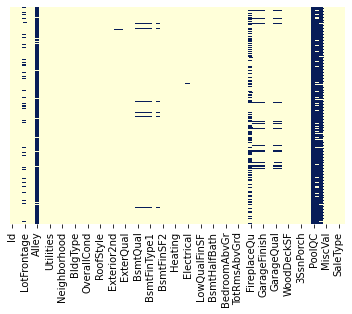

In [48]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.show()

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

we can observe some missing values present

In [50]:
#making list of feature have null values
na_test=[col for col in test.columns if test[col].isnull().sum()>1]

for attributes in na_test:
    print(attributes,np.round(test[attributes].isnull().mean(),2),'%missing values')

LotFrontage 0.15 %missing values
Alley 0.95 %missing values
BsmtQual 0.02 %missing values
BsmtCond 0.02 %missing values
BsmtExposure 0.02 %missing values
BsmtFinType1 0.02 %missing values
BsmtFinType2 0.02 %missing values
FireplaceQu 0.48 %missing values
GarageType 0.06 %missing values
GarageYrBlt 0.06 %missing values
GarageFinish 0.06 %missing values
GarageQual 0.06 %missing values
GarageCond 0.06 %missing values
PoolQC 1.0 %missing values
Fence 0.85 %missing values
MiscFeature 0.97 %missing values


We can observe the % of missing values 'PoolQC' have no non-null values

In [51]:
len(na_test)

16

In [52]:
na_test

['LotFrontage',
 'Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# EDA

In [53]:
#treating missing values
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])

test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])

test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])

test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])

test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])

test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

In [54]:
#drop the column which have more than 80% of missing values
test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

#we can aso dro the id column
test.drop(['Id'],axis=1,inplace=True)

In [55]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

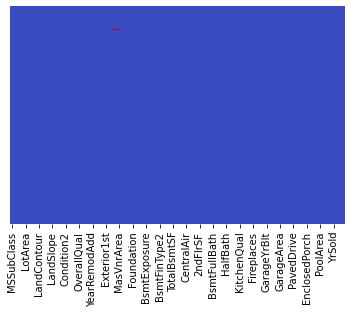

In [56]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

Still we can see a little of missing values may be there s only one missing value let's drop it

In [57]:
test.dropna(inplace=True)

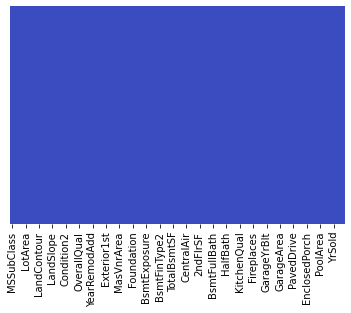

In [58]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

Now there is no missing values

In [59]:
test.shape

(290, 75)

In [60]:
test['Utilities'].value_counts()

AllPub    289
NoSeWa      1
Name: Utilities, dtype: int64

In [61]:
test.drop(['Utilities'],axis=1,inplace=True)

In [62]:
#as we drop month of sold in train data let's drop it from test data
test.drop(['MoSold'],axis=1,inplace=True)

In [63]:
#we can make list of categorical variables
categorical_test=[feature for feature in test.columns if test[feature].dtypes == 'O']

print('number of categorical variables \n',len(categorical))
#categorical features
test[categorical_test].head()

number of categorical variables 
 38


,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,HLS,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Ex,Attchd,RFn,TA,TA,Y,COD,Abnorml
2,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Bnk,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,Fa,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal


In [64]:
len(categorical_test)

38

In [65]:
for i in categorical:
    print("The feature is {} and no of categories are {}".format(i,test[i].unique()))

The feature is MSZoning and no of categories are ['RL' 'RM' 'FV' 'C (all)']
The feature is Street and no of categories are ['Pave' 'Grvl']
The feature is LotShape and no of categories are ['IR1' 'Reg' 'IR3' 'IR2']
The feature is LandContour and no of categories are ['HLS' 'Lvl' 'Bnk' 'Low']
The feature is LotConfig and no of categories are ['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
The feature is LandSlope and no of categories are ['Gtl' 'Mod' 'Sev']
The feature is Neighborhood and no of categories are ['StoneBr' 'CollgCr' 'Crawfor' 'Somerst' 'MeadowV' 'Edwards' 'NridgHt'
 'SawyerW' 'Mitchel' 'BrkSide' 'NAmes' 'Timber' 'OldTown' 'Sawyer'
 'IDOTRR' 'SWISU' 'Gilbert' 'NWAmes' 'BrDale' 'NPkVill' 'NoRidge'
 'Blmngtn' 'Veenker' 'ClearCr']
The feature is Condition1 and no of categories are ['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'PosN' 'RRAn' 'PosA']
The feature is Condition2 and no of categories are ['Norm' 'RRNn']
The feature is BldgType and no of categories are ['1Fam' 'TwnhsE' 'Twnhs' '2fm

# Encoding

In [66]:
#handling categorical
le=LabelEncoder()

for i in categorical_test:
    test[i]=le.fit_transform(test[i])

In [67]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,2007,5,2
1,120,2,66.425101,5814,1,0,3,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,2009,0,0
2,20,2,66.425101,11838,1,3,3,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,2009,5,2
3,70,2,75.000000,12000,1,3,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,2009,5,2
4,60,2,86.000000,14598,1,0,3,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,2008,5,2


Encoded using label encoder

In [68]:
print("Train:",train.shape)
print("Test:",test.shape)

Train: (1168, 74)
Test: (290, 73)


In [69]:
#train['Source']='Train'#every train data it shows source as train
#test['Source']='Test' #every test data it shows sourcr as test
df=pd.concat([train,test],ignore_index=True)

In [70]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2007,8,4,128000.0
1,20,3,95.00000,15865,1,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2007,8,4,268000.0
2,60,3,92.00000,9920,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2007,8,4,269790.0
3,20,3,105.00000,11751,1,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2010,0,4,190000.0
4,20,3,70.98847,16635,1,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,2009,8,4,215000.0


In [71]:
df.shape

(1458, 74)

In [72]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [73]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition
0,120,3,70.98847,4928,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2007,8,4
1,20,3,95.00000,15865,1,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2007,8,4
2,60,3,92.00000,9920,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2007,8,4
3,20,3,105.00000,11751,1,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2010,0,4
4,20,3,70.98847,16635,1,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,2009,8,4


In [74]:
pd.DataFrame(y.head())

,SalePrice
0,128000
1,268000
2,269790
3,190000
4,215000


# Scaling

In [76]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Building

In [77]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.8689936954998788
At random state 0,the testing r2_score is:- 0.6625545017479881


At random state 1,the training r2_score is:- 0.8363628605430249
At random state 1,the testing r2_score is:- 0.8144492437439514


At random state 2,the training r2_score is:- 0.8414570427192449
At random state 2,the testing r2_score is:- 0.7801534375013697


At random state 3,the training r2_score is:- 0.8240413938787524
At random state 3,the testing r2_score is:- 0.8624095727227561


At random state 4,the training r2_score is:- 0.8673612334626679
At random state 4,the testing r2_score is:- 0.6195475015530056


At random state 5,the training r2_score is:- 0.9037383308968704
At random state 5,the testing r2_score is:- 0.41552661294223703


At random state 6,the training r2_score is:- 0.8262330991476108
At random state 6,the testing r2_score is:- 0.8526568066230388


At random state 7,the training r2_score is:- 0.8418045532803986
At random state 7,the testing r2

At random state 76,the testing r2_score is:- 0.8352352283362995


At random state 77,the training r2_score is:- 0.8791445719781033
At random state 77,the testing r2_score is:- 0.2948740300543131


At random state 78,the training r2_score is:- 0.8406935711451747
At random state 78,the testing r2_score is:- 0.7812162285406907


At random state 79,the training r2_score is:- 0.8338205610776499
At random state 79,the testing r2_score is:- 0.8189280967036854


At random state 80,the training r2_score is:- 0.8357101407614249
At random state 80,the testing r2_score is:- 0.8165408225725109


At random state 81,the training r2_score is:- 0.8700438479840878
At random state 81,the testing r2_score is:- 0.6516397754695982


At random state 82,the training r2_score is:- 0.8361701837057587
At random state 82,the testing r2_score is:- 0.8125095480016944


At random state 83,the training r2_score is:- 0.839173494153002
At random state 83,the testing r2_score is:- 0.7974211042467119


At random state 84

At random state 154,the training r2_score is:- 0.8692034430780544
At random state 154,the testing r2_score is:- 0.544686928809756


At random state 155,the training r2_score is:- 0.8698778494720937
At random state 155,the testing r2_score is:- 0.5141800711845979


At random state 156,the training r2_score is:- 0.8323253937796837
At random state 156,the testing r2_score is:- 0.824065419623963


At random state 157,the training r2_score is:- 0.8405818557546306
At random state 157,the testing r2_score is:- 0.7911287449708135


At random state 158,the training r2_score is:- 0.8254811355904248
At random state 158,the testing r2_score is:- 0.8521807264378957


At random state 159,the training r2_score is:- 0.872973648649676
At random state 159,the testing r2_score is:- 0.7043225198768392


At random state 160,the training r2_score is:- 0.8514056479736241
At random state 160,the testing r2_score is:- 0.7168353341855302


At random state 161,the training r2_score is:- 0.8417296686347283
At ran

In [78]:
l

[46, 70, 74, 75, 103, 140, 152, 162, 176]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=189)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 84.55781628396963
Mean Absolute error 21198.778791948145
RMSE 30106.0824719269


In [80]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 1.0
At random state 0,the testing r2_score is:- 0.5624177475568637


At random state 1,the training r2_score is:- 1.0
At random state 1,the testing r2_score is:- 0.7103079253032882


At random state 2,the training r2_score is:- 1.0
At random state 2,the testing r2_score is:- 0.7841561462834599


At random state 3,the training r2_score is:- 1.0
At random state 3,the testing r2_score is:- 0.7162060456288282


At random state 4,the training r2_score is:- 1.0
At random state 4,the testing r2_score is:- 0.6683847171125961


At random state 5,the training r2_score is:- 1.0
At random state 5,the testing r2_score is:- 0.5493178623145865


At random state 6,the training r2_score is:- 1.0
At random state 6,the testing r2_score is:- 0.7840750226930968


At random state 7,the training r2_score is:- 1.0
At random state 7,the testing r2_score is:- 0.7622893725117692


At random state 8,the training r2_score is:- 1.0
At random state 8,the testing r2_score 

At random state 75,the training r2_score is:- 1.0
At random state 75,the testing r2_score is:- 0.7358352699670994


At random state 76,the training r2_score is:- 1.0
At random state 76,the testing r2_score is:- 0.8082600627295548


At random state 77,the training r2_score is:- 1.0
At random state 77,the testing r2_score is:- 0.6001169493303895


At random state 78,the training r2_score is:- 1.0
At random state 78,the testing r2_score is:- 0.6798419866186932


At random state 79,the training r2_score is:- 1.0
At random state 79,the testing r2_score is:- 0.7459410402613995


At random state 80,the training r2_score is:- 1.0
At random state 80,the testing r2_score is:- 0.6253174223606748


At random state 81,the training r2_score is:- 1.0
At random state 81,the testing r2_score is:- 0.759284573152158


At random state 82,the training r2_score is:- 1.0
At random state 82,the testing r2_score is:- 0.5957352196899498


At random state 83,the training r2_score is:- 1.0
At random state 83,the 

At random state 146,the training r2_score is:- 1.0
At random state 146,the testing r2_score is:- 0.7840838950840721


At random state 147,the training r2_score is:- 1.0
At random state 147,the testing r2_score is:- 0.6887646965701657


At random state 148,the training r2_score is:- 1.0
At random state 148,the testing r2_score is:- 0.748904142866573


At random state 149,the training r2_score is:- 1.0
At random state 149,the testing r2_score is:- 0.40865642161341154


At random state 150,the training r2_score is:- 1.0
At random state 150,the testing r2_score is:- 0.7681722534847245


At random state 151,the training r2_score is:- 1.0
At random state 151,the testing r2_score is:- 0.7999903278387868


At random state 152,the training r2_score is:- 1.0
At random state 152,the testing r2_score is:- 0.7263514016337349


At random state 153,the training r2_score is:- 1.0
At random state 153,the testing r2_score is:- 0.13036943207786444


At random state 154,the training r2_score is:- 1.0
At r

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=159)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 83.4421489702509
Mean Absolute error 25638.263698630137
RMSE 36297.76859320543


In [83]:
rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 86.74667479310646
Mean Absolute error 17819.706130136987
RMSE 29754.47367997112


In [90]:
xg=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print("r2 score",r2_score(y_test,predxg)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predxg))
print("RMSE",np.sqrt(mean_squared_error(y_test,predxg)))

r2 score 85.08702654077186
Mean Absolute error 19433.840847067637
RMSE 31562.541583779832


# Regularization

In [84]:
from sklearn.linear_model import Lasso

In [85]:
ls=Lasso(alpha=0.1)

ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8370627941891051

In [86]:
predls=ls.predict(x_test)

In [87]:
ls.coef_

array([-4719.65923924,  -746.82984175, -3805.0276228 ,  3824.53014402,
        2954.15041959, -1066.87730141,  3202.7483103 ,  -163.02261624,
         536.68307549,  2073.30627522, -1999.86884839, -3112.56302528,
       -3464.1303228 , -2018.9334453 , 16858.9957634 ,  4921.81200103,
        3358.0675067 ,   972.31043898,  1490.84151462,  6672.24880647,
       -5321.19736897,  3488.76444718,  2871.50083398,  6851.85988381,
       -7428.33746613,  -172.5849102 ,   492.39235426, -6594.00887186,
         875.40436696, -4076.88460631, -3958.54465565,  -249.535382  ,
        1820.96007803,   749.26070556,  -501.85550438,  -329.20330383,
       -1067.54971883, -1066.34465864,   153.43741766, -1299.11084725,
       11256.24733424,  9396.54188789,   885.94947047,  1655.38433745,
        4987.18369557,  -930.8877712 ,  5156.77264887,  2183.5268826 ,
        -663.54985429, -2769.05794463, -7137.73844243,  7689.8846879 ,
        2811.00530431,  4769.60483421, -2829.66335225,  -243.19883184,
      

# Cross validation Score

In [91]:
print("CV score and it's mean of Lasso :",cross_val_score(ls,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predls))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rfr,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predrf))
print("CV score and it's mean of Xgboost:",cross_val_score(xg,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predxg))

CV score and it's mean of Lasso : 0.7235275519411856 r2 score: 0.7883647148473142
CV score and it's mean of Decision Tree Regressor: 0.6976391232304852 r2 score: -1.1555781656583113
CV score and it's mean of Linear Regression: 0.7236252923746834 r2 score: -0.9236094353166933
CV score and it's mean of Random Forest: 0.8366633278707596 r2 score: 0.8674667479310647
CV score and it's mean of Xgboost: 0.8177197121313556 r2 score: 0.8508702654077186


Here I am choosing random forest as my final model

# Hyper Parameter Tuning

In [92]:
parameters={'min_samples_split':np.arange(10,20),'n_estimators':np.arange(120,150),'criterion':['squared_error','absolute_error','poisson'],
          'max_depth':np.arange(25,37)}

In [94]:
gsv=GridSearchCV(rfr,parameters,cv=7)

In [95]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),
                         'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149])})

In [98]:
gsv.best_params_

{'criterion': 'poisson',
 'max_depth': 36,
 'min_samples_split': 10,
 'n_estimators': 125}

In [99]:
best=RandomForestRegressor(criterion='poisson',max_depth=36,min_samples_split=10,n_estimators=125)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
b=(r2_score(y_test,predbest))
print(b*100)

63.11980077627186


In [100]:
#model saving
import joblib as jb
jb.dump(best,"house.pkl")

['house.pkl']